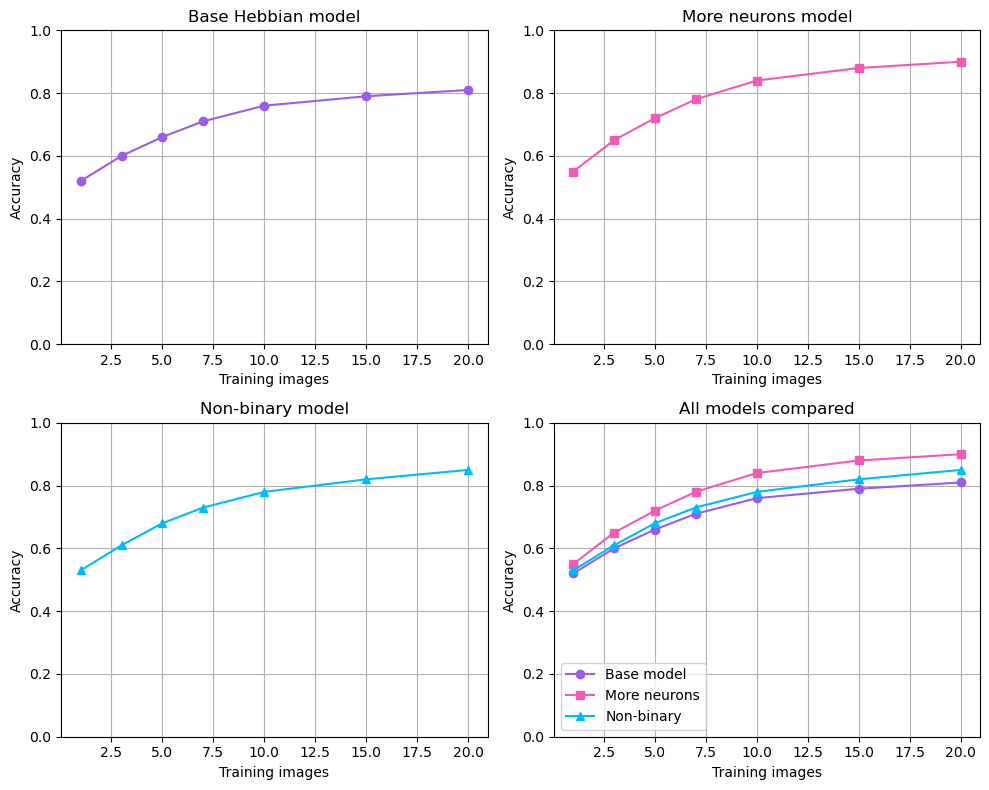

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# X-axis: number of training images
train_counts = np.array([1, 3, 5, 7, 10, 15, 20])

# Example accuracies (synthetic but realistic)
results_hebbian = np.array([0.52, 0.60, 0.66, 0.71, 0.76, 0.79, 0.81])
results_more_neurons = np.array([0.55, 0.65, 0.72, 0.78, 0.84, 0.88, 0.90])
results_non_binary = np.array([0.53, 0.61, 0.68, 0.73, 0.78, 0.82, 0.85])

color_hebbian = "#9b5de5"      # violet-purple
color_more_neurons = "#f15bb5" # hot pink
color_non_binary = "#00bbf9"   # cyan

# --- Create figure with subplots ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()  # make it easy to index as a 1D array

# --- Plot 1: Base model ---
axes[0].plot(train_counts, results_hebbian, 'o-', color=color_hebbian)
axes[0].set_title("Base Hebbian model")
axes[0].set_xlabel("Training images")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1)
axes[0].grid(True)

# --- Plot 2: More neurons model ---
axes[1].plot(train_counts, results_more_neurons, 's-', color=color_more_neurons)
axes[1].set_title("More neurons model")
axes[1].set_xlabel("Training images")
axes[1].set_ylabel("Accuracy")
axes[1].set_ylim(0, 1)
axes[1].grid(True)

# --- Plot 3: Non-binary model ---
axes[2].plot(train_counts, results_non_binary, '^-', color=color_non_binary)
axes[2].set_title("Non-binary model")
axes[2].set_xlabel("Training images")
axes[2].set_ylabel("Accuracy")
axes[2].set_ylim(0, 1)
axes[2].grid(True)

# --- Plot 4: Combined comparison ---
axes[3].plot(train_counts, results_hebbian, 'o-', color=color_hebbian, label='Base model')
axes[3].plot(train_counts, results_more_neurons, 's-', color=color_more_neurons, label='More neurons')
axes[3].plot(train_counts, results_non_binary, '^-',  color=color_non_binary, label='Non-binary')
axes[3].set_title("All models compared")
axes[3].set_xlabel("Training images")
axes[3].set_ylabel("Accuracy")
axes[3].set_ylim(0, 1)
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()


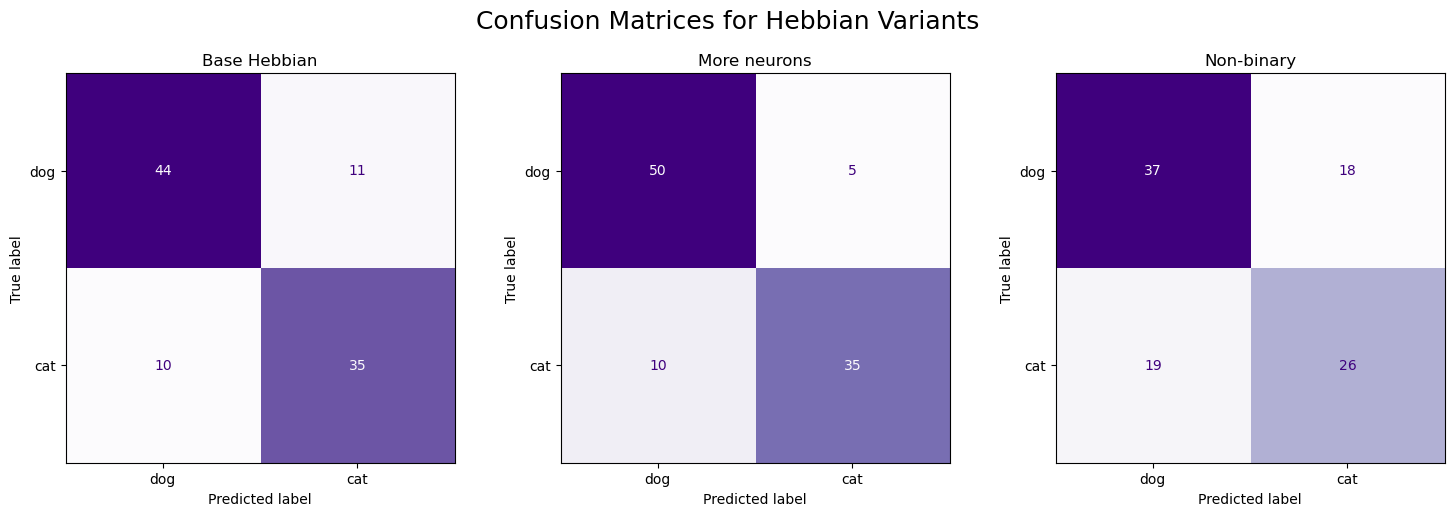

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Simulated ground truth and predictions ---
y_true = np.random.choice(['dog', 'cat'], size=100, p=[0.5, 0.5])

# Model 1: Base Hebbian (medium accuracy)
y_pred_base = [
    y if np.random.rand() > 0.25 else ('cat' if y == 'dog' else 'dog')
    for y in y_true
]

# Model 2: More neurons (higher accuracy)
y_pred_more_neurons = [
    y if np.random.rand() > 0.15 else ('cat' if y == 'dog' else 'dog')
    for y in y_true
]

# Model 3: Non-binary (lower accuracy, maybe more noise)
y_pred_non_binary = [
    y if np.random.rand() > 0.35 else ('cat' if y == 'dog' else 'dog')
    for y in y_true
]

# --- Compute confusion matrices ---
conf_matrices = [
    confusion_matrix(y_true, y_pred_base, labels=['dog', 'cat']),
    confusion_matrix(y_true, y_pred_more_neurons, labels=['dog', 'cat']),
    confusion_matrix(y_true, y_pred_non_binary, labels=['dog', 'cat'])
]

train_labels_list = ["Base Hebbian", "More neurons", "Non-binary"]

# --- Plot all confusion matrices ---
num_models = len(conf_matrices)
cols = 3
rows = int(np.ceil(num_models / cols))

plt.figure(figsize=(5 * cols, 5 * rows))

for i, (cm, label) in enumerate(zip(conf_matrices, train_labels_list)):
    ax = plt.subplot(rows, cols, i + 1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dog', 'cat'])
    disp.plot(cmap='Purples', values_format='d', ax=ax, colorbar=False)
    ax.set_title(label)

plt.suptitle("Confusion Matrices for Hebbian Variants", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


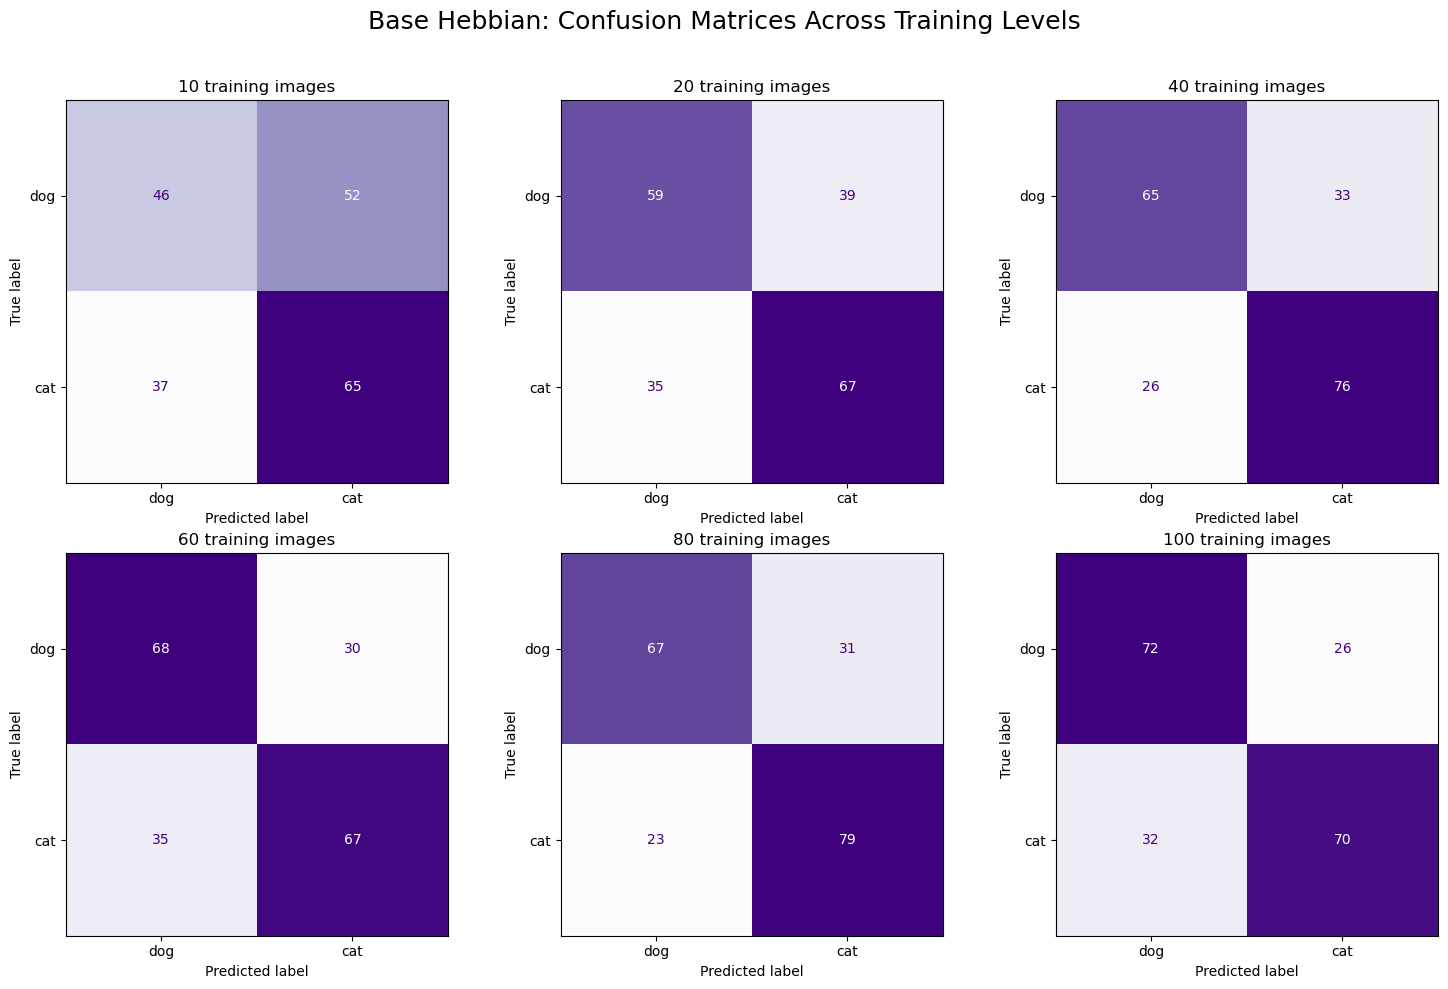

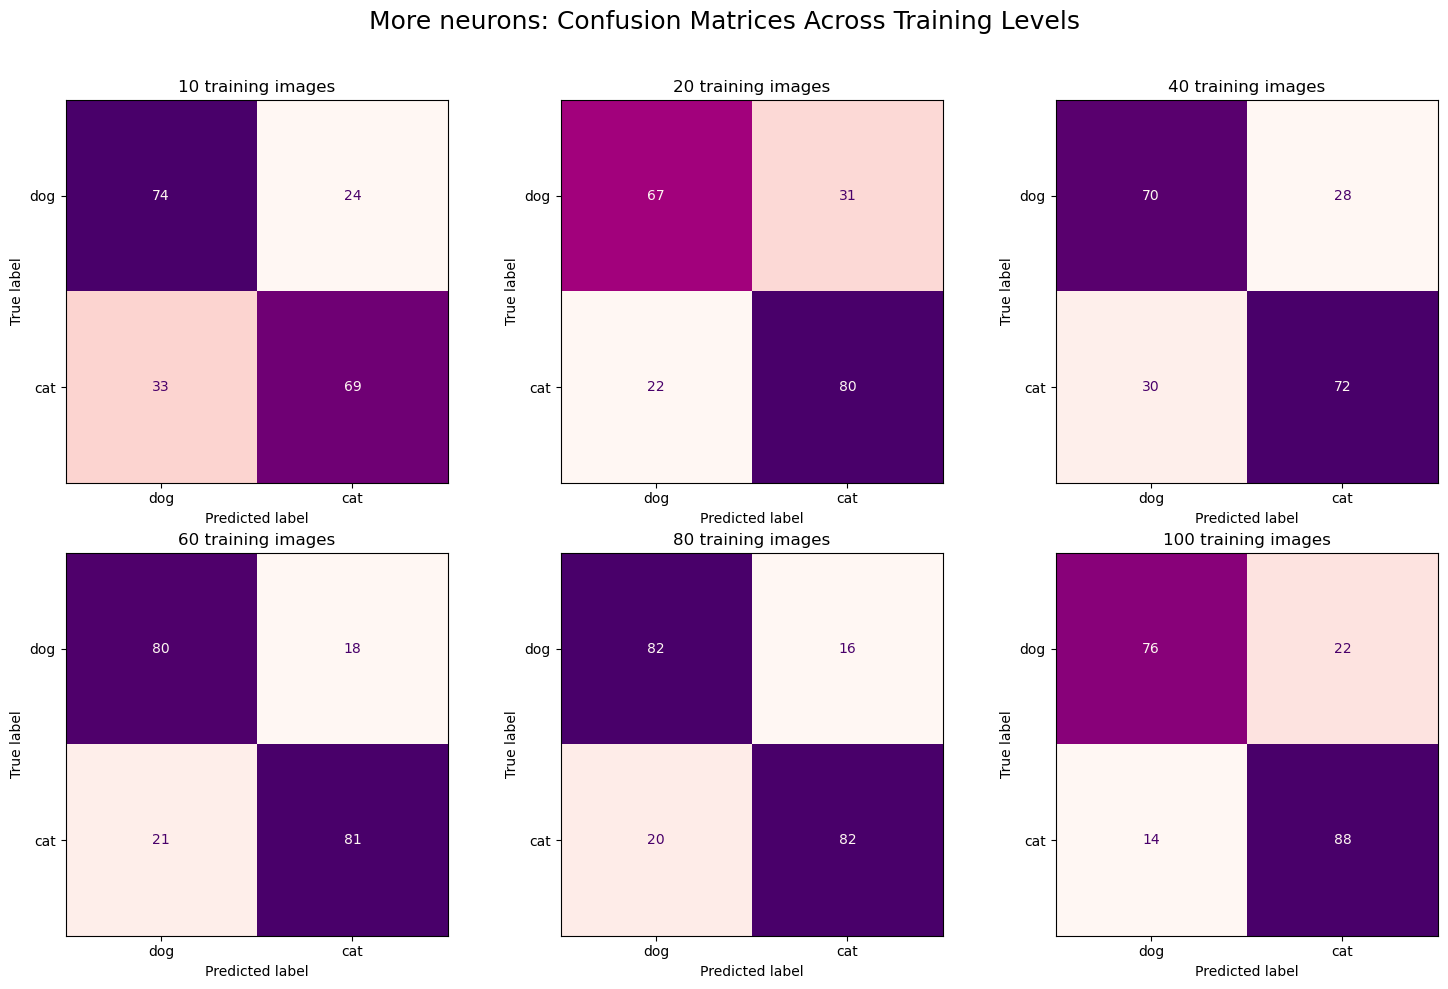

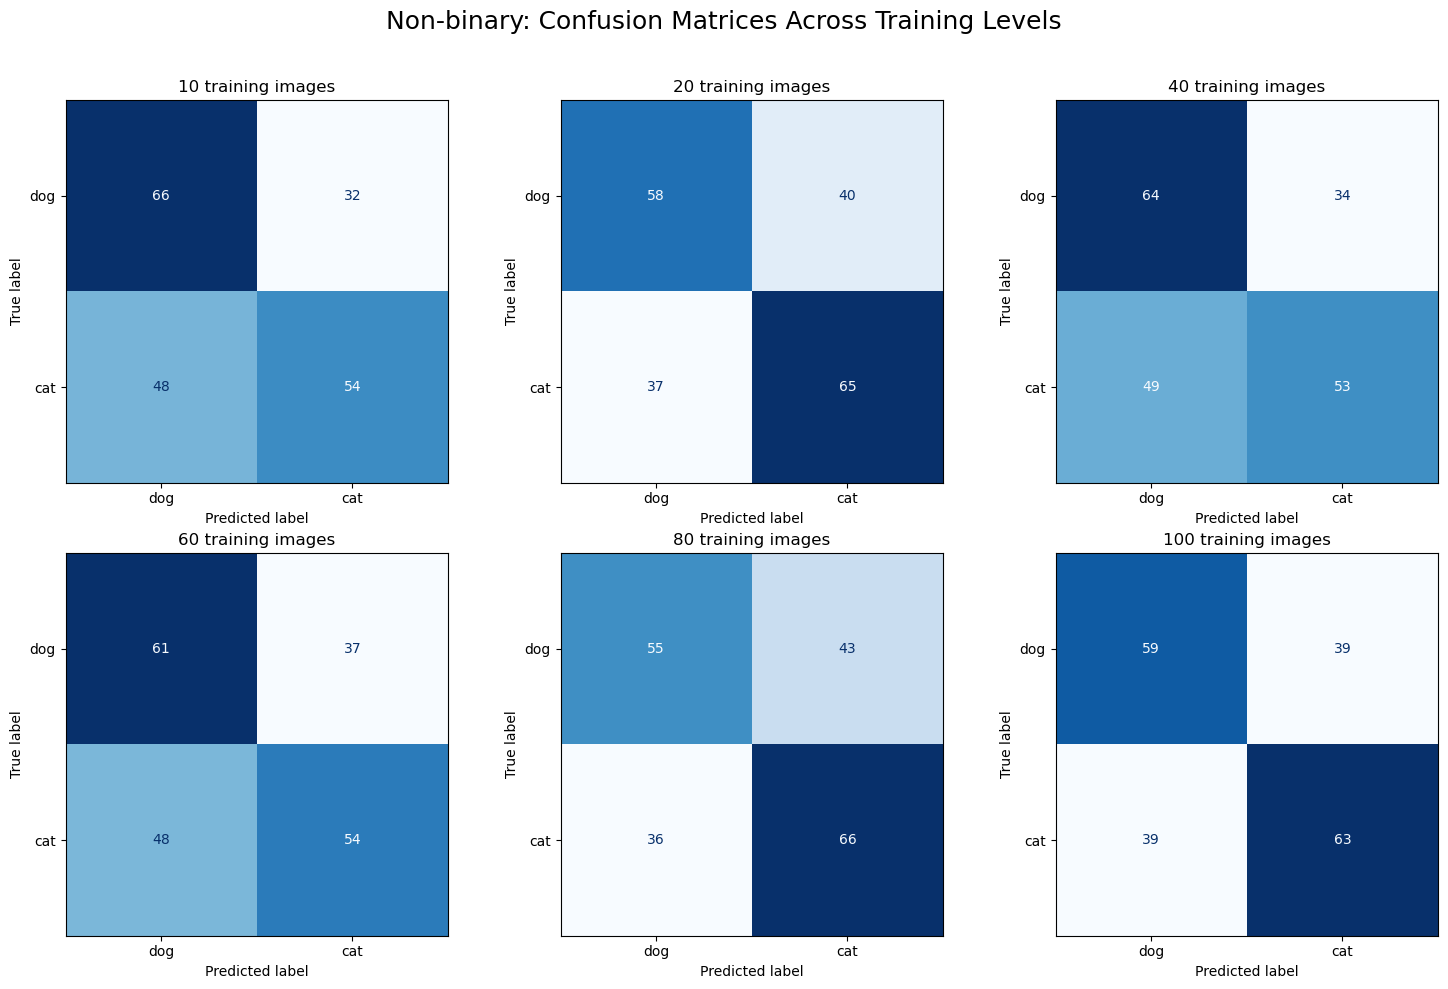

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Simulated experiment setup ---
train_counts = [10, 20, 40, 60, 80, 100]
models = ["Base Hebbian", "More neurons", "Non-binary"]

# --- Store results for all models ---
all_conf_matrices = {model: [] for model in models}

# --- Generate ground truth ---
y_true = np.random.choice(['dog', 'cat'], size=200, p=[0.5, 0.5])

for model in models:
    for n_train in train_counts:
        # Simulate that accuracy improves with more training data
        if model == "Base Hebbian":
            base_acc = 0.6 + (n_train / 1000)    # 0.61 → 0.7
        elif model == "More neurons":
            base_acc = 0.7 + (n_train / 800)     # 0.71 → 0.82
        else:  # Non-binary
            base_acc = 0.55 + (n_train / 1100)   # 0.56 → 0.64
        
        # Generate predictions
        y_pred = [
            y if np.random.rand() < base_acc else ('cat' if y == 'dog' else 'dog')
            for y in y_true
        ]
        
        # Compute confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=['dog', 'cat'])
        all_conf_matrices[model].append((n_train, cm))

model_colors = {
    "Base Hebbian": "Purples",
    "More neurons": plt.cm.RdPu,
    "Non-binary": "Blues"
}

# --- Plot confusion matrices per model ---
for model, data in all_conf_matrices.items():
    num_plots = len(data)
    cols = 3
    rows = int(np.ceil(num_plots / cols))
    
    plt.figure(figsize=(5 * cols, 5 * rows))
    
    for i, (n_train, cm) in enumerate(data):
        ax = plt.subplot(rows, cols, i + 1)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dog', 'cat'])
        disp.plot(cmap=model_colors[model], values_format='d', ax=ax, colorbar=False)
        ax.set_title(f"{n_train} training images")
    
    plt.suptitle(f"{model}: Confusion Matrices Across Training Levels", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

